<a href="https://colab.research.google.com/github/irsyadazka/probstat/blob/main/TugasBesarIF2220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar IF2220 Probabilitas dan Statistika

## Penarikan Kesimpulan dan Hipotesis

| NIM      | NAMA                        |
|----------|-----------------------------|
| 13520002 | Muhammad Fikri Ranjabi      |
| 13520107 | Azka Syauqy Irsyad          |

Untuk mengerjakan tugas ini, pertama disiapkan terlebih dahulu file csv serta library yang dibutuhkan.

In [ ]:
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr, t, norm, f
from scipy.stats import normaltest

water_df = pd.read_csv("water_potability.csv", sep=",", names=["id", "ph", "hardness", "solids", "chloramines", "sulfate", "conductivity", "organiccarbon", "trihalomethanes", "turbidity", "potability"])
water_df

,id,ph,hardness,solids,chloramines,sulfate,conductivity,organiccarbon,trihalomethanes,turbidity,potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dapat dilihat bahwa dataset tersebut memiliki 2010 baris dan 11 kolom. Berikutnya akan dicek banyaknya data yang memiliki nilai NaN.

In [ ]:
water_df.isnull().sum()

id                 0
ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organiccarbon      0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

Dari hasil pengecekan di atas, tidak ada data yang bernilai NaN sehingga kita dapat lanjut ke dalam analisis.

## Persoalan Nomor 1
Q : Menulis deskripsi statistika dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.

A : Untuk beberapa deksripsi statistika dapat didapat langsung sebagai berikut.

In [ ]:
print("Describe ph:")
water_df["ph"].describe()

Describe ph:


count    2010.000000
mean        7.087193
std         1.572803
min         0.227499
25%         6.090785
50%         7.029490
75%         8.053006
max        14.000000
Name: ph, dtype: float64

In [ ]:
print("Describe hardness:")
water_df["hardness"].describe()

Describe hardness:


count    2010.000000
mean      195.969209
std        32.643166
min        73.492234
25%       176.740657
50%       197.203525
75%       216.447589
max       317.338124
Name: hardness, dtype: float64

In [ ]:
print("Describe solids:")
water_df["solids"].describe()

Describe solids:


count     2010.000000
mean     21904.673439
std       8625.397911
min        320.942611
25%      15614.412962
50%      20926.882155
75%      27170.534649
max      56488.672413
Name: solids, dtype: float64

In [ ]:
print("Describe chloramines:")
water_df["chloramines"].describe()

Describe chloramines:


count    2010.000000
mean        7.134322
std         1.585214
min         1.390871
25%         6.138326
50%         7.142014
75%         8.109933
max        13.127000
Name: chloramines, dtype: float64

In [ ]:
print("Describe sulfate:")
water_df["sulfate"].describe()

Describe sulfate:


count    2010.000000
mean      333.211376
std        41.211111
min       129.000000
25%       307.626986
50%       332.214113
75%       359.268147
max       481.030642
Name: sulfate, dtype: float64

In [ ]:
print("Describe conductivity:")
water_df["conductivity"].describe()

Describe conductivity:


count    2010.000000
mean      426.476708
std        80.701872
min       201.619737
25%       366.619219
50%       423.438372
75%       482.209772
max       753.342620
Name: conductivity, dtype: float64

In [ ]:
print("Describe organiccarbon:")
water_df["organiccarbon"].describe()

Describe organiccarbon:


count    2010.000000
mean       14.357940
std         3.325770
min         2.200000
25%        12.122530
50%        14.323286
75%        16.683562
max        27.006707
Name: organiccarbon, dtype: float64

In [ ]:
print("Describe trihalomethanes:")
water_df["trihalomethanes"].describe()

Describe trihalomethanes:


count    2010.000000
mean       66.400717
std        16.081109
min         8.577013
25%        55.949993
50%        66.482041
75%        77.294613
max       124.000000
Name: trihalomethanes, dtype: float64

In [ ]:
print("Describe turbidity:")
water_df["turbidity"].describe()

Describe turbidity:


count    2010.000000
mean        3.969497
std         0.780471
min         1.450000
25%         3.442882
50%         3.967374
75%         4.514663
max         6.494749
Name: turbidity, dtype: float64

Sudah didapat nilai dari mean, median (50%), standar deviasi (std), nilai minimum (min), nilai maksimum (max), kuartil pertama (25%), kuartil kedua (50%), dan kuartil ketiga (75%) dari masing-masing kolom.

Untuk pencarian data modus dari tiap kolom adalah sebagai berikut. Perhatikan bahwa nilai dari tiap-tiap kolom numerik bersifat unik sehingga akan menunjukan keseluruhan nilai yang ada.


In [ ]:
dfnontarget = water_df.iloc[:,1:-1]
pd.set_option('display.max_columns', None, 'display.max_rows', None)
dfnontarget.mode()

,ph,hardness,solids,chloramines,sulfate,conductivity,organiccarbon,trihalomethanes,turbidity
0,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
1,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207
2,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101
3,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554
4,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529
5,2.128531,94.908977,3413.081633,2.484380,192.033592,254.392306,5.159380,17.915723,1.844372
6,2.376768,97.280909,3640.734320,2.498597,203.444521,254.393276,5.188466,18.015272,1.872573
7,2.538116,98.452931,4111.785432,2.621268,205.935091,257.007718,5.196717,19.175175,1.910117
8,2.558103,98.771644,4168.196994,2.648390,206.247229,257.704179,5.218233,22.219327,1.917754
9,2.569244,100.457615,4304.492483,2.654491,207.890482,258.880209,5.315287,23.136611,1.961475


Untuk pencarian data variansi dari tiap kolom adalah sebagai berikut.

In [ ]:
print("Variansi ph:\t\t\t       ", water_df["ph"].var())
print("Variansi hardness:\t\t    ", water_df["hardness"].var())
print("Variansi solids:\t\t", water_df["solids"].var())
print("Variansi chloramines:\t\t       ", water_df["chloramines"].var())
print("Variansi sulfate:\t\t    ", water_df["sulfate"].var())
print("Variansi conductivity:\t\t    ", water_df["conductivity"].var())
print("Variansi organiccarbon:\t\t      ", water_df["organiccarbon"].var())
print("Variansi trihalomethanes:\t     ", water_df["trihalomethanes"].var())
print("Variansi turbidity:\t\t       ", water_df["turbidity"].var())

Variansi ph:			        2.473709110235527
Variansi hardness:		     1065.5762773262459
Variansi solids:		 74397489.12637082
Variansi chloramines:		        2.5129037373356113
Variansi sulfate:		     1698.355671965135
Variansi conductivity:		     6512.792113200974
Variansi organiccarbon:		       11.060746104199099
Variansi trihalomethanes:	      258.602066101418
Variansi turbidity:		        0.6091350453844459


Untuk pencarian data range dari tiap kolom adalah sebagai berikut.



In [ ]:
print("Range ph:\t\t   ", water_df["ph"].max()-water_df["ph"].min())
print("Range hardness:\t\t  ", water_df["hardness"].max()-water_df["hardness"].min())
print("Range solids:\t\t", water_df["solids"].max()-water_df["solids"].min())
print("Range chloramines:\t   ", water_df["chloramines"].max()-water_df["chloramines"].min())
print("Range sulfate:\t\t  ", water_df["sulfate"].max()-water_df["sulfate"].min())
print("Range conductivity:\t  ", water_df["conductivity"].max()-water_df["conductivity"].min())
print("Range organiccarbon:\t   ", water_df["organiccarbon"].max()-water_df["organiccarbon"].min())
print("Range trihalomethanes:\t  ", water_df["trihalomethanes"].max()-water_df["trihalomethanes"].min())
print("Range turbidity:\t    ", water_df["turbidity"].max()-water_df["turbidity"].min())

Range ph:		    13.7725009497978
Range hardness:		   243.84589036652147
Range solids:		 56167.72980146483
Range chloramines:	    11.736129095114823
Range sulfate:		   352.03064230599716
Range conductivity:	   551.7228828031471
Range organiccarbon:	    24.80670661116602
Range trihalomethanes:	   115.4229870670162
Range turbidity:	     5.044748555990993


Untuk pencarian data interquatile range dari tiap kolom adalah sebagai berikut.

In [ ]:
print("Interquatile range ph:\t\t\t    ", iqr(water_df["ph"]))
print("Interquatile range hardness:\t\t   ", iqr(water_df["hardness"]))
print("Interquatile range solids:\t\t", iqr(water_df["solids"]))
print("Interquatile range chloramines:\t\t    ", iqr(water_df["chloramines"]))
print("Interquatile range sulfate:\t\t   ", iqr(water_df["sulfate"]))
print("Interquatile range conductivity:\t  ", iqr(water_df["conductivity"]))
print("Interquatile range organiccarbon:\t    ", iqr(water_df["organiccarbon"]))
print("Interquatile range trihalomethanes:\t   ", iqr(water_df["trihalomethanes"]))
print("Interquatile range turbidity:\t\t    ", iqr(water_df["turbidity"]))

Interquatile range ph:			     1.9622212193680078
Interquatile range hardness:		    39.7069319905726
Interquatile range solids:		 11556.12168698927
Interquatile range chloramines:		     1.9716068285606472
Interquatile range sulfate:		    51.641160905344634
Interquatile range conductivity:	   115.5905531635616
Interquatile range organiccarbon:	     4.561031372126081
Interquatile range trihalomethanes:	    21.344619778035543
Interquatile range turbidity:		     1.0717810966444437


Untuk pencarian data skewness dari tiap kolom adalah sebagai berikut.

In [ ]:
print("Skewness ph:\t\t\t ", water_df["ph"].skew())
print("Skewness hardness:\t\t", water_df["hardness"].skew())
print("Skewness solids:\t\t ", water_df["solids"].skew())
print("Skewness chloramines:\t\t ", water_df["chloramines"].skew())
print("Skewness sulfate:\t\t", water_df["sulfate"].skew())
print("Skewness conductivity:\t\t ", water_df["conductivity"].skew())
print("Skewness organiccarbon:\t\t", water_df["organiccarbon"].skew())
print("Skewness trihalomethanes:\t", water_df["trihalomethanes"].skew())
print("Skewness turbidity:\t\t", water_df["turbidity"].skew())

Skewness ph:			  0.04853451405270669
Skewness hardness:		 -0.08532104172868622
Skewness solids:		  0.5910113724580447
Skewness chloramines:		  0.013003497779569528
Skewness sulfate:		 -0.04572780443653543
Skewness conductivity:		  0.26801233302645316
Skewness organiccarbon:		 -0.02021975629181238
Skewness trihalomethanes:	 -0.05138268451619478
Skewness turbidity:		 -0.03226597968019271


Untuk pencarian data kurtosis dari tiap kolom adalah sebagai berikut.

In [ ]:
print("Kurtosis ph:\t\t\t ", water_df["ph"].kurt())
print("Kurtosis hardness:\t\t ", water_df["hardness"].kurt())
print("Kurtosis solids:\t\t ", water_df["solids"].kurt())
print("Kurtosis chloramines:\t\t ", water_df["chloramines"].kurt())
print("Kurtosis sulfate:\t\t ", water_df["sulfate"].kurt())
print("Kurtosis conductivity:\t\t", water_df["conductivity"].kurt())
print("Kurtosis organiccarbon:\t\t ", water_df["organiccarbon"].kurt())
print("Kurtosis trihalomethanes:\t ", water_df["trihalomethanes"].kurt())
print("Kurtosis turbidity:\t\t", water_df["turbidity"].kurt())

Kurtosis ph:			  0.6269041256617065
Kurtosis hardness:		  0.5254804942991402
Kurtosis solids:		  0.33732026745944976
Kurtosis chloramines:		  0.5497821097667472
Kurtosis sulfate:		  0.7868544988131605
Kurtosis conductivity:		 -0.23720600574806516
Kurtosis organiccarbon:		  0.031018388192253
Kurtosis trihalomethanes:	  0.2230167810639787
Kurtosis turbidity:		 -0.049830796949249745


## Persoalan Nomor 2
Q: Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

A: Dari 10 kolom yang tersedia terdapat 1 kolom non-numerik yaitu potability sehingga terdapat 9 kolom numerik pada dataset dengan ditampilkan masing-masing histogram dan boxplot sebagai berikut.
### 2.1 pH
Dapat dilihat dari histogram bahwa nilai pH memiliki frekuensi terbanyak pada range 6-7. Kemudian dari boxplot didapat Interquartile Range berada pada 6-8.

Text(0.5, 1.0, 'pH Boxplot')

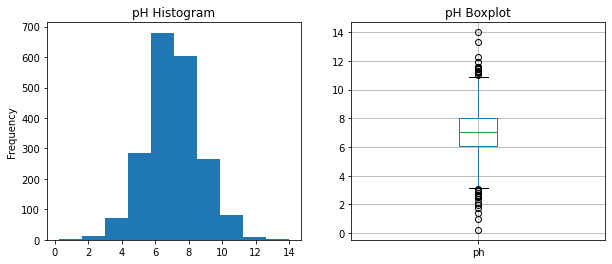

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["ph"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["ph"])
axes[0].set_title("pH Histogram")
axes[1].set_title("pH Boxplot")

### 2.2 Hardness
Dapat dilihat bahwa histogram positively skewed sehingga nilai most frequent value rendah dan dari boxplot didapat bahwa median mendekati angka 200.

Text(0.5, 1.0, 'Hardness Boxplot')

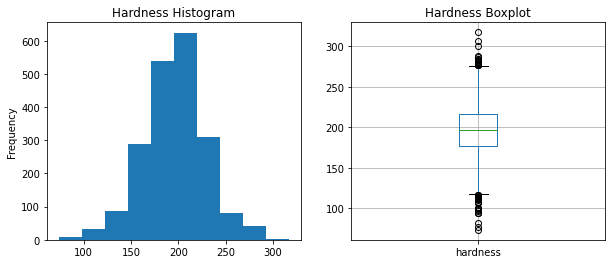

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["hardness"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["hardness"])
axes[0].set_title("Hardness Histogram")
axes[1].set_title("Hardness Boxplot")

### 2.3 Solids
Sama seperti histogram 2.2, kolom solids memiliki positive skewness sehingga nilai yang muncul dengan frekuensi terbanyak adalah rendah dan dari boxplot terlihat bahwa hampir semua outliers lebih besar dari nilai maksimum dan tidak ada outliers yang lebih kecil dari nilai minimum.

Text(0.5, 1.0, 'solids Boxplot')

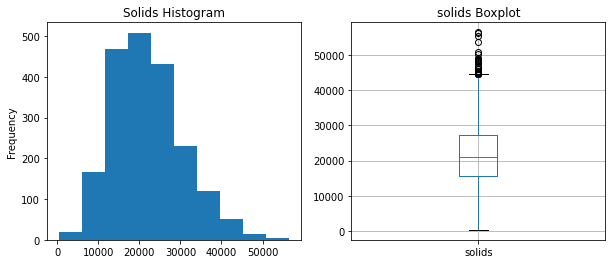

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["solids"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["solids"])
axes[0].set_title("Solids Histogram")
axes[1].set_title("solids Boxplot")

### 2.4 Chloramines
Dari histogram dapat dilihat bahwa nilai chlooramines range 6-7 dengan range 7-8 memiliki frekuensi yang hampir sama dan pada boxplot nilai Interquartile Range berada pada nilai 6-8.

Text(0.5, 1.0, 'Chloramines Boxplot')

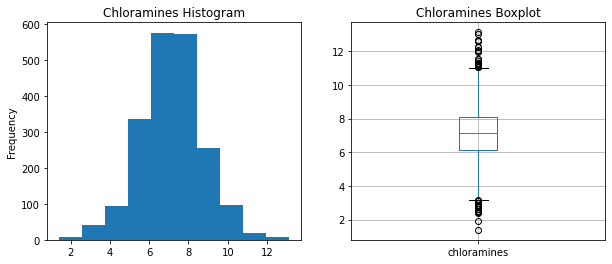

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["chloramines"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["chloramines"])
axes[0].set_title("Chloramines Histogram")
axes[1].set_title("Chloramines Boxplot")

### 2.5 Sulfate
Dapat dilihat bahwa histogram adalah negatively skewed sehingga frekuensi terbanyak berada pada nilai yang tinggi dan pada boxplot terdapat 1 buah outliers yang paling jauh dari nilai minimum yang berada pada range 0-150.

Text(0.5, 1.0, 'Sulfate Boxplot')

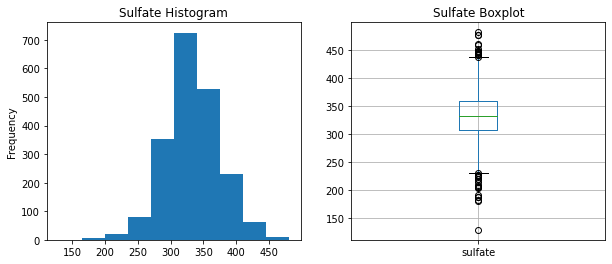

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["sulfate"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["sulfate"])
axes[0].set_title("Sulfate Histogram")
axes[1].set_title("Sulfate Boxplot")

### 2.6 Conductivity
Dari histogram dapat dilihat bahwa nilai conductivity memiliki positive skewness dan pada boxplot semua outliers memiliki nilai yang lebih besar dari nilai maksimum dengan nilai Q3 hampir mendekati 500.

Text(0.5, 1.0, 'Conductivity Boxplot')

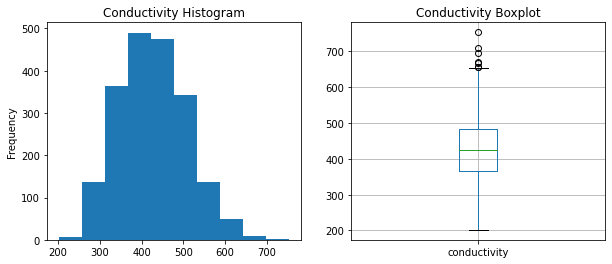

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["conductivity"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["conductivity"])
axes[0].set_title("Conductivity Histogram")
axes[1].set_title("Conductivity Boxplot")

### 2.7 Organic Carbon
Dapat dilihat bahwa nilai median hampir mendekati 15.

Text(0.5, 1.0, 'Organic Carbon Boxplot')

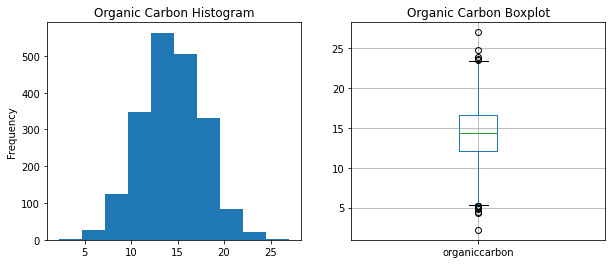

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["organiccarbon"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["organiccarbon"])
axes[0].set_title("Organic Carbon Histogram")
axes[1].set_title("Organic Carbon Boxplot")

### 2.8 Trihalomethanes
Dapat dilihat bahwa histogram adalah normal distributions dan pada boxplot nilai median berada pada range 60-80.

Text(0.5, 1.0, 'Trihalomethanes Boxplot')

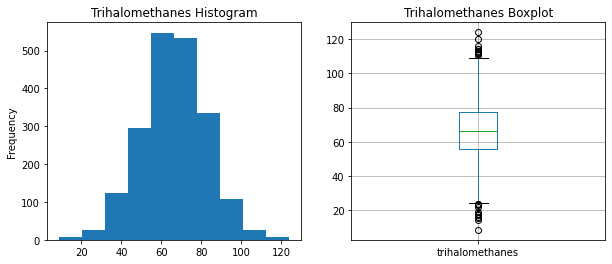

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["trihalomethanes"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["trihalomethanes"])
axes[0].set_title("Trihalomethanes Histogram")
axes[1].set_title("Trihalomethanes Boxplot")

### 2.9 Turbidity
Dapat dilihat bahwa histogram adalah normal distributions dan nilai median adalah 4.

Text(0.5, 1.0, 'Turbidity Boxplot')

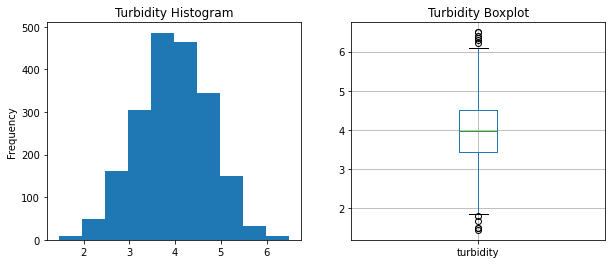

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
water_df["turbidity"].plot.hist(ax=axes[0], figsize=(10, 4))
water_df.boxplot(column=["turbidity"])
axes[0].set_title("Turbidity Histogram")
axes[1].set_title("Turbidity Boxplot")

## Persoalan Nomor 3
Q: Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

A: Terdapat 9 kolom numerik dan ditentukan normalitynya dengan analisis dari histogram plot berdasarkan penglihatan. Dapat disimpulkan dari 3 kolom terakhir bahwa kolom ***Turbidity, Trihalomethanes, dan Organic Carbon*** terdistribusi normal. Pernyataan ini didukung dengan p-value yang didapatkan dari normal test, jika p-value > alpha (0.05) maka dapat disimpulkan kolom tersebut terdistribusi normal.

Kesimpulan:
Kolom organiccarbon terdistribusi normal.
Kolom trihalomethanes terdistribusi normal.
Kolom turbidity terdistribusi normal.



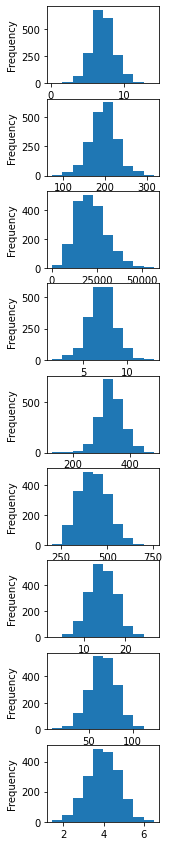

In [ ]:
fig, axes = plt.subplots(nrows=9, ncols=1)
water_df["ph"].plot.hist(ax=axes[0], figsize=(2, 15))
water_df["hardness"].plot.hist(ax=axes[1], figsize=(2, 15))
water_df["solids"].plot.hist(ax=axes[2], figsize=(2, 15))
water_df["chloramines"].plot.hist(ax=axes[3], figsize=(2, 15))
water_df["sulfate"].plot.hist(ax=axes[4], figsize=(2, 15))
water_df["conductivity"].plot.hist(ax=axes[5], figsize=(2, 15))
water_df["organiccarbon"].plot.hist(ax=axes[6], figsize=(2, 15))
water_df["trihalomethanes"].plot.hist(ax=axes[7], figsize=(2, 15))
water_df["turbidity"].plot.hist(ax=axes[8], figsize=(2, 15))

print("Kesimpulan:")
# normality test
for column in water_df:
  stat, p = normaltest(water_df[column])
  if p > 0.05:
      print('Kolom {} terdistribusi normal.'.format(column))
print()

## Persoalan Nomor 4
Q: Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

a. Nilai Rata-rata pH di atas 7?

b. Nilai Rata-rata Hardness tidak sama dengan 205?

c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan
10%?

e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

In [ ]:
# Fungsi Menghitung Z-Score
def z_score(sampleMean, populationMean, populationStd, sampleSize):
  return ( (sampleMean - populationMean) / (populationStd/math.sqrt(sampleSize)) )

def test_procedure(z_score, significance, type, h0, h1):
  print("Critical Value: {}".format(z_score)) 
  print("Significance Level: {}".format(significance))
  if type == "One Tailed":
    p_value = scipy.stats.norm.sf(abs(z_score))
  elif type == "Two Tailed":
    p_value = 2 * scipy.stats.norm.sf(abs(z_score))
  print("P-Value: {}".format(p_value))
  if p_value <= significance:
    print("\nKarena p-value lebih kecil dari significance level, maka dapat disimpulkan bahwa {}".format(h1))
  else:
    print("\nKarena p-value lebih besar dari significance level, maka dapat disimpulkan bahwa {}".format(h0))

### 4.1 Nilai Rata-rata pH di atas 7?
Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 = 𝜇 = 7$, yang sesuai dengan fakta keadaan saat ini.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$, 

$𝐻_1 = 𝜇 > 7$, yang merupakan pertanyaan yang ingin dibuktikan.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***One Tailed Single Sample Mean Test*** dimana ***One Tailed*** berarti acuan hipotesis adalah "lebih besar dari" karena hanya perlu dibuktikan nilai rata-rata pH di atas 7, ***Single Sample*** berarti terdapat satu buah sampel yang dites, dan ***Mean Test*** karena menguji rata-rata sampel.

Kemudian ditentukan daerah kritis dengan menghitung $z$,
$$ z = \frac{\bar{x} - μ_{0}} {\sigma/\sqrt{n}} $$
dengan $μ_{0} = 7, \sigma = 1.5728, n = 2010,$ dan $\bar{x}$ yang didapat dari rata-rata sample yang diambil.

Karena $n \ge 30$, maka standar deviasi populasi dapat diaproksimasi dengan menggunakan standar deviasi sampel.

Ditentukan p-value yang didapat dari daerah kritis kurva normal. 

Jika p-value kurang dari atau sama dengan $\alpha$ maka $𝐻_1$ dapat diterima.

Jika p-value lebih dari $\alpha$, maka $𝐻_0$ dapat diterima.



Critical Value: 2.4854451473798127
Significance Level: 0.05
P-Value: 0.006469476288897809

Karena p-value lebih kecil dari significance level, maka dapat disimpulkan bahwa Rata-Rata pH di atas 7.



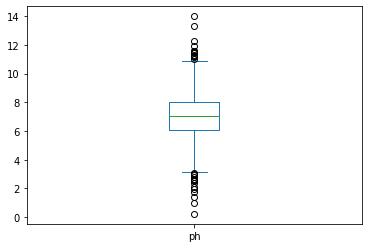

In [ ]:
ph_sample_size = 2010
samplePH = water_df["ph"].sample(ph_sample_size)
ph_sample_mean = samplePH.mean()
ph_population_mean = 7
ph_population_std = water_df["ph"].std()
ph_significance = 0.05

z_score_val = z_score(ph_sample_mean, ph_population_mean, ph_population_std, ph_sample_size)
test_procedure(z_score_val, ph_significance, "One Tailed", "Rata-Rata pH sama dengan 7.", "Rata-Rata pH di atas 7.")
print()
samplePH.plot.box()

### 4.2 Nilai Rata-rata Hardness tidak sama dengan 205?
Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 = 𝜇 = 205$, yang sesuai dengan fakta keadaan saat ini.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$, 

$𝐻_1 = 𝜇 \neq 205$, yang merupakan pertanyaan yang ingin dibuktikan.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***Two Tailed Single Sample Mean Test*** dimana ***Two Tailed*** berarti acuan hipotesis adalah "tidak sama dengan" yang berarti rata-rata dapat bernilai lebih dari 205 atau kurang dari 205, ***Single Sample*** berarti terdapat satu buah sampel yang dites, dan ***Mean Test*** karena menguji rata-rata sampel.

Kemudian ditentukan daerah kritis dengan menghitung $z$,
$$ z = \frac{\bar{x} - μ_{0}} {\sigma/\sqrt{n}} $$
dengan $μ_{0} = 195.97, \sigma = 32.64, n = 2010,$ dan $\bar{x}$ yang didapat dari rata-rata sample yang diambil.

Karena $n \ge 30$, maka standar deviasi populasi dapat diaproksimasi dengan menggunakan standar deviasi sampel.

Ditentukan p-value yang didapat dari daerah kritis kurva normal. 

Jika p-value kurang dari atau sama dengan $\alpha$ maka $𝐻_1$ dapat diterima.

Jika p-value lebih dari $\alpha$, maka $𝐻_0$ dapat diterima.

Critical Value: -12.403137170010272
Significance Level: 0.05
P-Value: 2.5128904895289496e-35

Karena p-value lebih kecil dari significance level, maka dapat disimpulkan bahwa Rata-Rata Hardness tidak sama dengan 205.



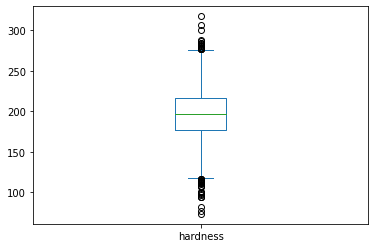

In [ ]:
hardness_sample_size = 2010
sample_hardness = water_df["hardness"].sample(ph_sample_size)
hardness_sample_mean = sample_hardness.mean()
hardness_population_mean = 205
hardness_population_std = water_df["hardness"].std()
hardness_significance = 0.05

z_score_val = z_score(hardness_sample_mean, hardness_population_mean, hardness_population_std, hardness_sample_size)
test_procedure(z_score_val, hardness_significance, "Two Tailed", "Rata-Rata Hardness sama dengan 205.", "Rata-Rata Hardness tidak sama dengan 205.")
print()
sample_hardness.plot.box()

### 4.3 Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?
Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 = 𝜇 = 21900$, yang sesuai dengan fakta keadaan saat ini.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$, 

$𝐻_1 = 𝜇 \neq 21900$, yang merupakan pertanyaan yang ingin dibuktikan.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***Two Tailed Single Sample Mean Test*** dimana ***Two Tailed*** berarti acuan hipotesis adalah "tidak sama dengan" yang berarti rata-rata dapat bernilai lebih dari 21900 atau kurang dari 21900, ***Single Sample*** berarti terdapat satu buah sampel yang dites, dan ***Mean Test*** karena menguji rata-rata sampel.

Kemudian ditentukan daerah kritis dengan menghitung $z$,
$$ z = \frac{\bar{x} - μ_{0}} {\sigma/\sqrt{n}} $$
dengan $μ_{0} = 21904.67, \sigma = 8625.39, n = 100,$ dan $\bar{x}$ yang didapat dari rata-rata sample yang diambil 100 baris pertama.

Karena $n \ge 30$, maka standar deviasi populasi dapat diaproksimasi dengan menggunakan standar deviasi sampel.

Ditentukan p-value yang didapat dari daerah kritis kurva normal. 

Jika p-value kurang dari atau sama dengan $\alpha$ maka $𝐻_1$ dapat diterima.

Jika p-value lebih dari $\alpha$, maka $𝐻_0$ dapat diterima.

Critical Value: 0.5636797715721505
Significance Level: 0.05
P-Value: 0.5729720864655207

Karena p-value lebih besar dari significance level, maka dapat disimpulkan bahwa Rata-Rata 100 baris pertama kolom Solids sama dengan 21900.



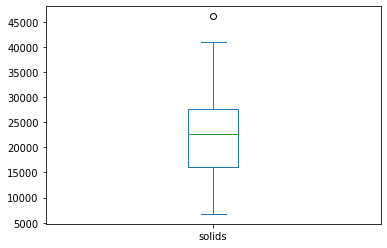

In [ ]:
solids_sample_size = 100
sample_solids = water_df["solids"].head(100)
solids_sample_mean = sample_solids.mean()
solids_population_mean = 21900
solids_population_std = sample_solids.std()
solids_significance = 0.05

z_score_val = z_score(solids_sample_mean, solids_population_mean, solids_population_std, solids_sample_size)
test_procedure(z_score_val, solids_significance, "Two Tailed", "Rata-Rata 100 baris pertama kolom Solids sama dengan 21900.", "Rata-Rata 100 baris pertama kolom Solids bukan 21900.")
print()
sample_solids.plot.box()

### 4.4 Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?
Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 = 𝑃 = 0.1$, yang sesuai dengan fakta keadaan saat ini.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$, 

$𝐻_1 = 𝜇 \neq 0.1$, yang merupakan pertanyaan yang ingin dibuktikan.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***Two Tailed Single Sample Proportion Test*** dimana ***Two Tailed*** berarti acuan hipotesis adalah "tidak sama dengan" yang berarti proporsi dapat bernilai lebih dari 10% atau kurang dari 10%, ***Single Sample*** berarti terdapat satu buah sampel yang dites, dan ***Proportion Test*** karena menguji proporsi sampel.

Didapat jumlah sampel yang memiliki nilai Conductivity lebih dari 450 sebanyak 745.

Kemudian ditentukan daerah kritis dengan menghitung $z$,
$$ z = \frac {\hat{p}-p_{0}} {\sqrt{p_{0}q_{0} / n}}  $$
dengan $\hat{p} = 0.37, \space p_{0} = 0.1, \space q_{0} = 0.9,$ dan $n$ yang diambil adalah 2010.

Ditentukan p-value yang didapat dari daerah kritis kurva normal. 

Jika p-value kurang dari atau sama dengan $\alpha$ maka $𝐻_1$ dapat diterima.

Jika p-value lebih dari $\alpha$, maka $𝐻_0$ dapat diterima.

Jumlah nilai Conductivity yang lebih dari 450 adalah 745
Critical Value: 40.44637613158932
Significance Level: 0.05
P-Value: 0.0

Karena p-value lebih kecil dari significance level, maka dapat disimpulkan bahwa Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%



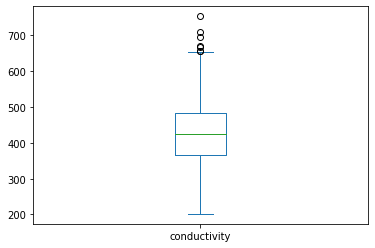

In [ ]:
def z_score(sampleProportion, successRate, failRate, sampleSize):
  return ( (sampleProportion - successRate) / (math.sqrt(successRate * failRate / sampleSize)) )

def test_procedure_proportion(z_score, significance, type, h0, h1):
  print("Critical Value: {}".format(z_score)) 
  print("Significance Level: {}".format(significance))
  if type == "One Tailed":
    p_value = scipy.stats.norm.sf(abs(z_score))
  elif type == "Two Tailed":
    p_value = 2 * scipy.stats.norm.sf(abs(z_score))
  print("P-Value: {}".format(p_value))
  if p_value <= significance:
    print("\nKarena p-value lebih kecil dari significance level, maka dapat disimpulkan bahwa {}".format(h1))
  else:
    print("\nKarena p-value lebih besar dari significance level, maka dapat disimpulkan bahwa {}".format(h0))

conductivity_sample_size = 2010
conductivity_larger_450 = water_df["conductivity"].loc[water_df["conductivity"] > 450]
conductivity_larger_450_size = len(conductivity_larger_450)
sample_proportion = conductivity_larger_450_size / conductivity_sample_size
success_rate = 0.1
fail_rate = 0.9
conductivity_significance = 0.05

print("Jumlah nilai Conductivity yang lebih dari 450 adalah {}".format(conductivity_larger_450_size))

conductivity_z_score_val = z_score(sample_proportion, success_rate, fail_rate, conductivity_sample_size)
test_procedure_proportion(conductivity_z_score_val, conductivity_significance, "Two Tailed", "Proporsi nilai Conductivity yang lebih dari 450, adalah sama dengan 10%", "Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%")
print()
water_df["conductivity"].plot.box()

### 4.5 Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?
Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 = 𝑃 = 0.05$, yang sesuai dengan fakta keadaan saat ini.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$, 

$𝐻_1 = 𝜇 < 0.05$, yang merupakan pertanyaan yang ingin dibuktikan.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***One Tailed Single Sample Proportion Test*** dimana ***One Tailed*** berarti acuan hipotesis adalah "kurang dari" yang berarti proporsi dapat bernilai kurang dari 5%, ***Single Sample*** berarti terdapat satu buah sampel yang dites, dan ***Proportion Test*** karena menguji proporsi sampel.

Didapat jumlah sampel yang memiliki nilai Trihalomethanes yang kurang dari 40 sebanyak 106.

Kemudian ditentukan daerah kritis dengan menghitung $z$,
$$ z = \frac {\hat{p}-p_{0}} {\sqrt{p_{0}q_{0} / n}}  $$
dengan $\hat{p} = 0.0527, \space p_{0} = 0.05, \space q_{0} = 0.95,$ dan $n$ yang diambil adalah 2010.

Ditentukan p-value yang didapat dari daerah kritis kurva normal. 

Jika p-value kurang dari atau sama dengan $\alpha$ maka $𝐻_1$ dapat diterima.

Jika p-value lebih dari $\alpha$, maka $𝐻_0$ dapat diterima.

Jumlah nilai Trihalomethanes yang lebih dari 450 adalah 106
Critical Value: 0.5628826416670951
Significance Level: 0.05
P-Value: 0.286757400490763

Karena p-value lebih besar dari significance level, maka dapat disimpulkan bahwa Proporsi nilai Trihalomethanes yang kurang dari 40, adalah sama dengan 5%



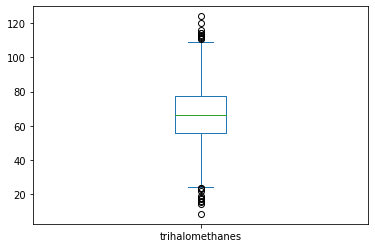

In [ ]:
def z_score(sampleProportion, successRate, failRate, sampleSize):
  return ( (sampleProportion - successRate) / (math.sqrt(successRate * failRate / sampleSize)) )

def test_procedure_proportion(z_score, significance, type, h0, h1):
  print("Critical Value: {}".format(z_score)) 
  print("Significance Level: {}".format(significance))
  if type == "One Tailed":
    p_value = scipy.stats.norm.sf(abs(z_score))
  elif type == "Two Tailed":
    p_value = 2 * scipy.stats.norm.sf(abs(z_score))
  print("P-Value: {}".format(p_value))
  if p_value <= significance:
    print("\nKarena p-value lebih kecil dari significance level, maka dapat disimpulkan bahwa {}".format(h1))
  else:
    print("\nKarena p-value lebih besar dari significance level, maka dapat disimpulkan bahwa {}".format(h0))

trihalomethanes_sample_size = 2010
trihalomethanes_smaller_40 = water_df["trihalomethanes"].loc[water_df["trihalomethanes"] < 40]
trihalomethanes_smaller_40_size = len(trihalomethanes_smaller_40)
sample_proportion = trihalomethanes_smaller_40_size / trihalomethanes_sample_size
success_rate = 0.05
fail_rate = 0.95
trihalomethanes_significance = 0.05

print("Jumlah nilai Trihalomethanes yang lebih dari 450 adalah {}".format(trihalomethanes_smaller_40_size))

trihalomethanes_z_score_val = z_score(sample_proportion, success_rate, fail_rate, trihalomethanes_sample_size)
test_procedure_proportion(trihalomethanes_z_score_val, trihalomethanes_significance, "One Tailed", "Proporsi nilai Trihalomethanes yang kurang dari 40, adalah sama dengan 5%", "Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%")
print()
water_df["trihalomethanes"].plot.box()

## Persoalan Nomor 5

Q : Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

Berikut adalah persoalan lanjutan yang diberikan.

### 5.1 Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Berikut adalah tampilan boxplot ketika kolom Sulfate dibagi menjadi dua bagian yang sama besar.

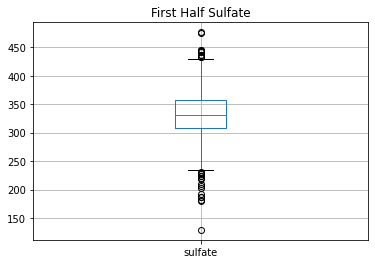

In [ ]:
first = water_df.loc[:1004].boxplot(["sulfate"])
first.set_title("First Half Sulfate")
plt.show()

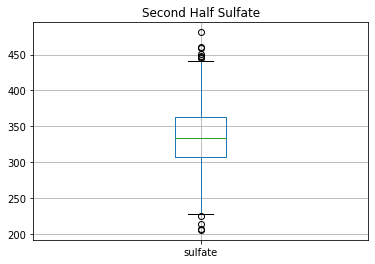

In [ ]:
second = water_df.loc[1005:].boxplot(["sulfate"])
second.set_title("Second Half Sulfate")
plt.show()

Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 : 𝜇_{first} = 𝜇_{second}$ yang sesuai dengan pertanyaan soal.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$ sebagai berikut,

$𝐻_1 : 𝜇_{first} \neq 𝜇_{second}$ yang menyatakan bahwa rata-rata bagian awal dan akhir tidak sama.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***Two Tailed Two Sample Mean Test*** dimana ***Two Tailed*** berarti acuan hipotesis adalah "tidak sama dengan" yang memerlukan pembuktian sisa yang satu dengan sisi yang lainnya, ***Two Sample*** berarti terdapat dua buah sampel berupa bagian awal dan akhir, dan ***Mean Test*** yang menguji rata-rata sampel.

Dengan menggunakan tes **Z-test**, daerah kritis didefinisikan sebagai $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$.

Batasan daerah kritis didapat sebagai berikut.

In [ ]:
a = norm.ppf(1-0.025)
print(round(a, 4))
print(round(-a, 4))

1.96
-1.96


Dengan demikian, didapatkan daerah kritisnya adalah $z < -1.96$ atau $z > 1.96$.

Agar nilai $H_{0}$ diterima, nilai $z$ harus berada di luar daerah kritis. Perumusan dari nilai $z$ adalah sebagai berikut.

$z = \frac{\bar{X}_{1} - \bar{X}_{2} - (𝜇_1 - 𝜇_2)}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}}$

Diketahui:
$𝜇_1 - 𝜇_2 = 0$

Akan dilakukan pencarian dari nilai $\bar{X}_{1}, \bar{X}_{2}, s_{1}^{2}, s_{2}^{2}$ sebagai berikut

In [ ]:
x1 = water_df.loc[:1004, "sulfate"].mean()
print("Nilai rata-rata dari first adalah", round(x1, 4))
x2 = water_df.loc[1005:, "sulfate"].mean()
print("Nilai rata-rata dari second adalah", round(x2, 4))
s1 = water_df.loc[:1004, "sulfate"].var()
print("Nilai variansi dari first adalah", round(s1, 4))
s2 = water_df.loc[1005:, "sulfate"].var()
print("Nilai variansi dari second adalah", round(s2, 4))

Nilai rata-rata dari first adalah 331.3053
Nilai rata-rata dari second adalah 335.1174
Nilai variansi dari first adalah 1708.3966
Nilai variansi dari second adalah 1682.7331


Setelah itu, akan dilakukan perhitungan nilai dari $z$ serta $p-value$ sebagai berikut.

In [ ]:
zval = (x1-x2)/math.sqrt((s1/1005) + (s2/1005))
print("Nilai z\t\t:", round(zval, 4))
pval = 2*norm.sf(abs(zval))
print("Nilai p-value\t: ", round(pval, 4))

Nilai z		: -2.0753
Nilai p-value	:  0.038


Dari nilai $z$ di atas, dapat disimpulkan bahwa keputusan yang diambil adalah menolak $H_{0}$, yang mengakibatkan **rata-rata kedua bagian tidak sama besar**.

### 5.2 Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

Berikut adalah tampilan boxplot ketika kolom OrganicCarbon dibagi menjadi dua bagian yang sama besar. 

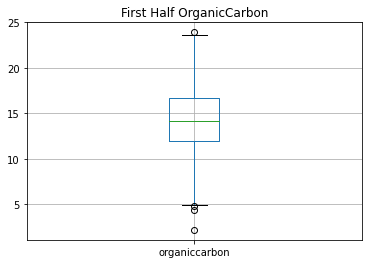

In [ ]:
first = water_df.loc[:1004].boxplot(["organiccarbon"])
first.set_title("First Half OrganicCarbon")
plt.show()

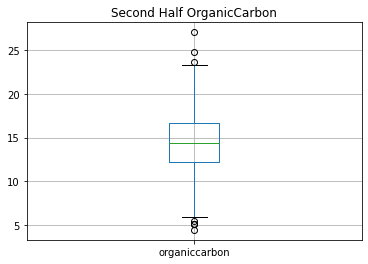

In [ ]:
second = water_df.loc[1005:].boxplot(["organiccarbon"])
second.set_title("Second Half OrganicCarbon")
plt.show()

Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 : 𝜇_{first} = 𝜇_{second} + 0.15$ yang sesuai dengan pertanyaan soal.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$ sebagai berikut,

$𝐻_1 : 𝜇_{first} \neq 𝜇_{second} + 0.15$ yang menyatakan bahwa rata-rata bagian awal dan akhir ditambah $0.15$ tidak sama.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***Two Tailed Two Sample Mean Test*** dimana ***Two Tailed*** berarti acuan hipotesis adalah "tidak sama dengan" yang memerlukan pembuktian sisa yang satu dengan sisi yang lainnya, ***Two Sample*** berarti terdapat dua buah sampel berupa bagian awal dan akhir, dan ***Mean Test*** yang menguji rata-rata sampel.

Dengan menggunakan tes **Z-test**, daerah kritis didefinisikan sebagai $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$.

Batasan daerah kritis didapat sebagai berikut.

In [ ]:
a = t.ppf(0.025, 2008)
print(round(a, 4))
print(round(-a, 4))

-1.9611
1.9611


Dengan demikian, didapatkan daerah kritisnya adalah $z < -1.96$ atau $z > 1.96$.

Agar nilai $H_{0}$ diterima, nilai $z$ harus berada di luar daerah kritis. Perumusan dari nilai $z$ adalah sebagai berikut.

$z = \frac{\bar{X}_{1} - \bar{X}_{2} - (𝜇_1 - 𝜇_2)}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}}$

Diketahui:
$𝜇_1 - 𝜇_2 = 0.15$

Akan dilakukan pencarian dari nilai $\bar{X}_{1}, \bar{X}_{2}, s_{1}^{2}, s_{2}^{2}$ sebagai berikut

In [ ]:
x1 = water_df.loc[:1004, "organiccarbon"].mean()
print("Nilai rata-rata dari first adalah", round(x1, 4))
x2 = water_df.loc[1005:, "organiccarbon"].mean()
print("Nilai rata-rata dari second adalah", round(x2, 4))
s1 = water_df.loc[:1004, "organiccarbon"].var()
print("Nilai variansi dari first adalah", round(s1, 4))
s2 = water_df.loc[1005:, "organiccarbon"].var()
print("Nilai variansi dari fsecond adalah", round(s2, 4))

Nilai rata-rata dari first adalah 14.254
Nilai rata-rata dari second adalah 14.4619
Nilai variansi dari first adalah 11.2303
Nilai variansi dari fsecond adalah 10.8806


Setelah itu, akan dilakukan perhitungan nilai dari $z$ serta $p-value$ sebagai berikut.

In [ ]:
zval = (x1-x2-0.15)/math.sqrt((s1/1005) + (s2/1005))
print("Nilai z\t\t:", round(zval, 4))
pval = 2*norm.sf(abs(zval))
print("Nilai p-value\t: ", round(pval, 4))

Nilai z		: -2.4131
Nilai p-value	:  0.0158


Dari nilai $z$ di atas, dapat disimpulkan bahwa keputusan yang diambil adalah menolak $H_{0}$, yang mengakibatkan **rata-rata bagian bagian pertama tidak lebih besar sebesar 0.15 daripada bagian kedua**.

### 5.3 Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

Berikut adalah tampilan boxplot ketika kolom Chloramine dibagi menjadi dua bagian, yaitu 100 baris pertama dan 100 baris terakhir. 

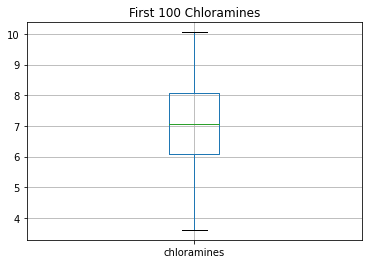

In [ ]:
first = water_df.loc[:99].boxplot(["chloramines"])
first.set_title("First 100 Chloramines")
plt.show()

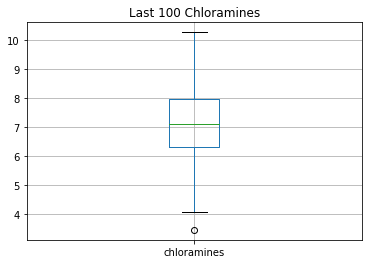

In [ ]:
second = water_df.loc[1910:].boxplot(["chloramines"])
second.set_title("Last 100 Chloramines")
plt.show()

Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 : 𝜇_{first} = 𝜇_{second}$ yang sesuai dengan pertanyaan soal.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$ sebagai berikut,

$𝐻_1 : 𝜇_{first} \neq 𝜇_{second}$ yang menyatakan bahwa rata-rata 100 baris pertama dan 100 baris akhir tidak sama.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***Two Tailed Two Sample Mean Test*** dimana ***Two Tailed*** berarti acuan hipotesis adalah "tidak sama dengan" yang memerlukan pembuktian sisa yang satu dengan sisi yang lainnya, ***Two Sample*** berarti terdapat dua buah sampel berupa bagian awal dan akhir, dan ***Mean Test*** yang menguji rata-rata sampel.

Dengan menggunakan tes **Z-test**, daerah kritis didefinisikan sebagai $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$.

Batasan daerah kritis didapat sebagai berikut.

In [ ]:
a = norm.ppf(1-0.025)
print(round(a, 4))
print(round(-a, 4))

1.96
-1.96


Dengan demikian, didapatkan daerah kritisnya adalah $z < -1.96$ atau $z > 1.96$.

Agar nilai $H_{0}$ diterima, nilai $z$ harus berada di luar daerah kritis. Perumusan dari nilai $z$ adalah sebagai berikut.

$z = \frac{\bar{X}_{1} - \bar{X}_{2} - (𝜇_1 - 𝜇_2)}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}}$

Diketahui:
$𝜇_1 - 𝜇_2 = 0$

Akan dilakukan pencarian dari nilai $\bar{X}_{1}, \bar{X}_{2}, s_{1}^{2}, s_{2}^{2}$ sebagai berikut

In [ ]:
x1 = water_df.loc[:99, "chloramines"].mean()
print("Nilai rata-rata dari first adalah", round(x1, 4))
x2 = water_df.loc[1910:, "chloramines"].mean()
print("Nilai rata-rata dari second adalah", round(x2, 4))
s1 = water_df.loc[:99, "chloramines"].var()
print("Nilai variansi dari first adalah", round(s1, 4))
s2 = water_df.loc[1910:, "chloramines"].var()
print("Nilai variansi dari second adalah", round(s2, 4))

Nilai rata-rata dari first adalah 7.0078
Nilai rata-rata dari second adalah 7.1472
Nilai variansi dari first adalah 2.193
Nilai variansi dari second adalah 1.7077


Setelah itu, akan dilakukan perhitungan nilai dari $t$ serta $p-value$ sebagai berikut.

In [ ]:
zval = (x1-x2)/math.sqrt((s1/100) + (s2/100))
print("Nilai t\t\t:", round(zval, 4))
pval = 2*norm.sf(abs(zval))
print("Nilai p-value\t: ", round(pval, 4))

Nilai t		: -0.7059
Nilai p-value	:  0.4802


Dari nilai $t$ di atas, dapat disimpulkan bahwa keputusan yang diambil adalah menerima $H_{0}$, yang mengakibatkan **rata-rata 100 bagian pertama dan 100 bagian terakhir sama besar**.

### 5.4 Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

Berikut adalah tampilan boxplot ketika kolom Turbidity dibagi menjadi dua bagian yang sama besar. 

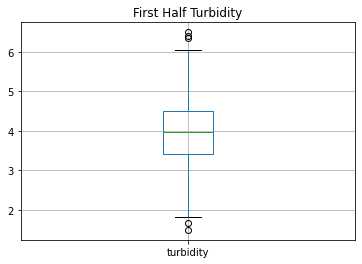

In [ ]:
first = water_df.loc[:1004].boxplot(["turbidity"])
first.set_title("First Half Turbidity")
plt.show()

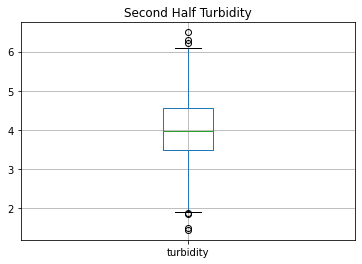

In [ ]:
second = water_df.loc[1005:].boxplot(["turbidity"])
second.set_title("Second Half Turbidity")
plt.show()

Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 : \hat{p}_{first} = \hat{p}_{second}$ yang sesuai dengan pertanyaan soal.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$ sebagai berikut,

$𝐻_1 : \hat{p}_{first} > \hat{p}_{second}$ yang menyatakan kontradiksi dari pertanyaan soal.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***One Tailed Two Sample Proportion Test*** dimana ***One Tailed*** berarti acuan hipotesis adalah "lebih besar dari" yang memerlukan pembuktian satu sisi saja, ***Two Sample*** berarti terdapat dua buah sampel berupa bagian awal dan akhir, dan ***Proportion Test*** yang menguji nilai proporsi sampel.

Dengan menggunakan tes **Z-test**, daerah kritis didefinisikan sebagai $z > z_a$.

Batasan daerah kritis didapat dengan berikut.

In [ ]:
z = norm.ppf(1-0.05)
print(round(z, 4))

1.6449


Dengan begitu didapat bahwa daerah kritisnya adalah $z > 1.6449$.

Agar nilai $H_{0}$ diterima, nilai $z$ harus berada di luar daerah kritis. Perumusan dari nilai $z$ adalah sebagai berikut.

$z = \frac{\hat{p}_{1} - \hat{p}_{2}}{\sqrt{pq (\frac{1}{n_{1}} + \frac{1}{n_{2}}})}$

$\hat{p} = \frac{x_1 + x_2}{n_1 + n_2} $

Akan dilakukan pencarian dari nilai ${x}_{1}, {x}_{2}$sebagai berikut

In [ ]:
front = water_df.loc[:1004, "turbidity"]
countfront = 0
for value in front:
  if value > 4:
    countfront += 1
print("x1 : ", countfront)
end = water_df.loc[1005:, "turbidity"]
countend = 0
for value in end:
  if value > 4:
    countend += 1
print("x2 : ", countend)

x1 :  486
x2 :  489


Setelah didapat nilai $x_1$ dan $x_2$, akan dihitung nilai proporsi sebagai berikut.

In [ ]:
p = (countfront + countend)/2010
print("p  : ", round(p, 4))
p1 = countfront/1005
print("p1 : ", round(p1, 4))
p2 = countend/1005
print("p2 : ", round(p2, 4))

p  :  0.4851
p1 :  0.4836
p2 :  0.4866


Lakukan perhitungan untuk mendapatkan nilai dari $z$ dan juga $p-value$.

Diketahui:

$q = 1 - p$

In [ ]:
zval = (p1 - p2)/math.sqrt(p * (1 - p) * (1/1005 + 1/1005))
print("Nilai z\t\t:", round(zval, 4))
pval = 1 - norm.cdf(zval)
print("Nilai p-value\t: ", round(pval, 4))

Nilai z		: -0.1339
Nilai p-value	:  0.5533


Dilihat dari nilai $z$ di atas, dapat disimpulkan bahwa hipotesis diterima, yang mengakibatkan bahwa **proporsi pada bagian awal lebih besar dibandingkan proporsi pada bagian akhir**.

### 5.5 Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

Berikut adalah tampilan boxplot ketika kolom Sulfate dibagi menjadi dua bagian yang sama besar. 

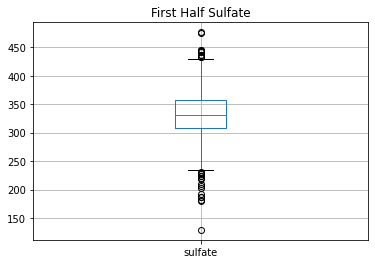

In [ ]:
first = water_df.loc[:1004].boxplot(["sulfate"])
first.set_title("First Half Sulfate")
plt.show()

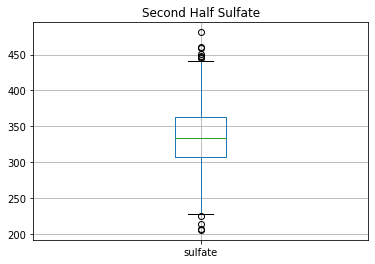

In [ ]:
second = water_df.loc[1005:].boxplot(["sulfate"])
second.set_title("Second Half Sulfate")
plt.show()

Pertama, kita tentukan hipotesis nol $𝐻_0$ sebagai berikut,

$𝐻_0 : \sigma_{first}^{2} = \sigma_{second}^{2}$ yang sesuai dengan pertanyaan soal.

Kedua, kita tentukan hipotesis alternatif $𝐻_1$ sebagai berikut,

$𝐻_1 : \sigma_{first}^{2} \neq \sigma_{second}^{2}$ yang menyatakan bahwa variansi bagian awal dan akhir tidak sama.

Setelah itu, ditetapkan tingkat signifikansi $\alpha = 0.05$.

Uji statistik yang sesuai dengan persoalan ini adalah ***Two Tailed Two Sample F-Test*** dimana ***Two Tailed*** berarti acuan hipotesis adalah "tidak sama dengan" yang memerlukan pembuktian sisa yang satu dengan sisi yang lainnya, ***Two Sample*** berarti terdapat dua buah sampel berupa bagian awal dan akhir, dan ***F-Test*** yang menguji nilai variansi sampel.

Dengan menggunakan tes **f-distribution**, daerah kritis didefinisikan sebagai $f < f_{1 - \alpha/2}(v_{1}, v_{2})$ atau $f > f_{\alpha/2}(v_{1}, v_{2})$, dengan $v_{1} = v_{2} = 1005 - 1 = 1004$.

Batasan daerah kritis didapat sebagai berikut.

In [ ]:
upper = f.ppf(1 - 0.025, 1004, 1004)
lower = f.ppf(0.025, 1004, 1004)
print(round(upper, 4))
print(round(lower, 4))

1.1318
0.8836


Dengan demikian, didapatkan daerah kritisnya adalah $f < 0.8836$ atau $f > 1.1318$.

Agar nilai $H_{0}$ diterima, nilai $f$ harus berada di luar daerah kritis. Perumusan dari nilai $f$ adalah sebagai berikut.

$f = \frac{S_{2}^{2}}{S_{1}^{2}}$

Akan dilakukan pencarian dari nilai $S_{1}^{2}, S_{2}^{2}$ sebagai berikut.

In [ ]:
awal = water_df["sulfate"].loc[:1004].var()
print("Variansi first adalah", round(awal, 4))
akhir = water_df["sulfate"].loc[1005:].var()
print("Variansi second adalah", round(akhir, 4))

Variansi first adalah 1708.3966
Variansi second adalah 1682.7331


Setelah itu, akan dicari nilai dari $f$ dan $p-value$ sebagai berikut.

In [ ]:
fval = awal/akhir
print("Nilai f\t\t: ", round(fval, 4))
pval = f.cdf(fval, 1004, 1004)
print("Nilai p-value\t: ", round(pval, 4))

Nilai f		:  1.0153
Nilai p-value	:  0.5947


Dari nilai $f$ di atas, dapat disimpulkan bahwa keputusan yang diambil adalah menerima $H_{0}$, yang mengakibatkan **variansi kedua bagian sama besar**.

## Persoalan Nomor 6

Q : Test korelasi, tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

A : Akan dilakukan test korelasi antara semua kolom non-target terhadap kolom target yaitu potability sebagai berikut.
### 6.1 PH terhadap Potability

Nilai korelasi = 0.01547509440843346


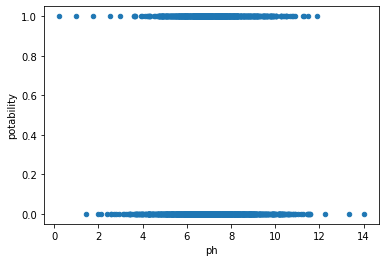

In [ ]:
water_df.plot(kind="scatter", x="ph", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[1]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil positif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding lurus.

### 6.2 Hardness terhadap Potability

Nilai korelasi = -0.001463152895947929


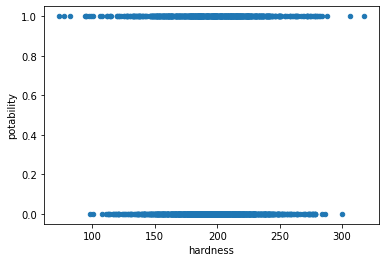

In [ ]:
water_df.plot(kind="scatter", x="hardness", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[2]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil negatif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding terbalik.

### 6.3 Solids terhadap Potability

Nilai korelasi = 0.038976578181734625


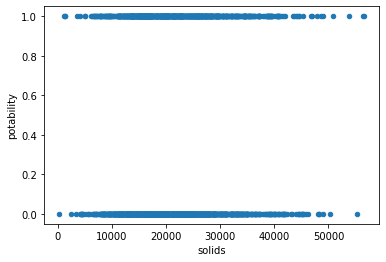

In [ ]:
water_df.plot(kind="scatter", x="solids", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[3]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil positif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding lurus.

### 6.4 Chloramines terhadap Potability

Nilai korelasi = 0.020778921840524073


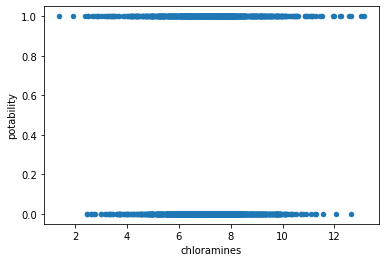

In [ ]:
water_df.plot(kind="scatter", x="chloramines", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[4]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil positif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding lurus.

### 6.5 Sulfate terhadap Potability

Nilai korelasi = -0.01570316441927377


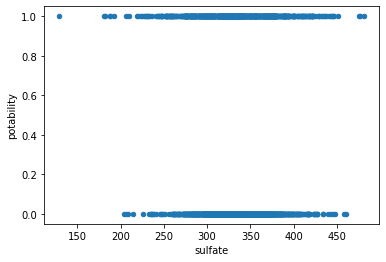

In [ ]:
water_df.plot(kind="scatter", x="sulfate", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[5]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil negatif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding terbalik.

### 6.6 Conductivity terhadap Potability

Nilai korelasi = -0.016257120111377078


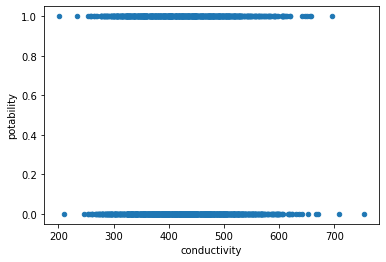

In [ ]:
water_df.plot(kind="scatter", x="conductivity", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[6]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil negatif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding terbalik.

### 6.7 Organic Carbon terhadap Potability

Nilai korelasi = -0.015488461910747264


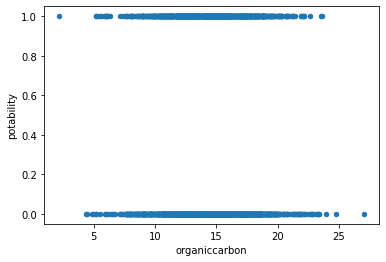

In [ ]:
water_df.plot(kind="scatter", x="organiccarbon", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[7]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil negatif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding terbalik.

### 6.8 Trihalomethanes terhadap Potability

Nilai korelasi = 0.009236711064712997


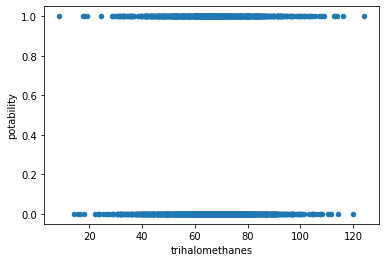

In [ ]:
water_df.plot(kind="scatter", x="trihalomethanes", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[8]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil positif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding lurus.

### 6.9 Turbidity terhadap Potability

Nilai korelasi = 0.022331042640622648


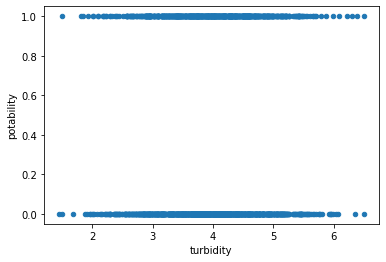

In [ ]:
water_df.plot(kind="scatter", x="turbidity", y="potability")
print("Nilai korelasi =", str(water_df[water_df.columns[9]].corr(water_df["potability"])))

Dari nilai korelasi yang menunjukan hasil positif tersebut, dapat dikatakan bahwa hubungan kedua kolom di atas berbanding lurus.